# Tasca mètodes de mostreig

Roger Gallart - 13 maig 2021

## Nivell 1
### Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [2]:
# Dataset resultats de la Liga de futbol 1995-2020
# Source: https://www.kaggle.com/kishan305/la-liga-results-19952020?select=LaLiga_Matches_1995-2020.csv

# Columns include Season, HomeTeam, AwayTeam, FTHG (Full-time home goals), 
# FTAG (Full time away goals), FTR (Full-time result), HTHG (Half time home goals), 
# HTAG (Half time away goals) & HTR (half time result).

df = pd.read_csv('https://raw.githubusercontent.com/itacademy-rogergallart/sampling/main/LaLiga_Matches_1995-2020.csv',
                 dtype={'HTHG':'Int64','HTAG':'Int64'})
df.head()

# HTHG i HTAG són variables enteres però algunes files tenen missing values. A l'importar, pandas
# per defecte ho converteix a Float64 i els valors mancants a np.nan
# Forcem el tipus a 'Int64' (Amb la I majúscula) que permet tenir una columna amb
# valors enters i missing values en format pandas.NA (enlloc de np.nan)
# Doc: https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,2/9/1995,La Coruna,Valencia,3,0,H,2,0,H
1,1995-96,2/9/1995,Sp Gijon,Albacete,3,0,H,3,0,H
2,1995-96,3/9/1995,Ath Bilbao,Santander,4,0,H,2,0,H
3,1995-96,3/9/1995,Ath Madrid,Sociedad,4,1,H,1,1,D
4,1995-96,3/9/1995,Celta,Compostela,0,1,A,0,0,D


In [3]:
# A la lliga de futbol española hi ha un gran desequilibri en els pressupostos
# cosa que pot influir els resultats. Afegim una columna booleana que indica si un 
# dels 2 equips que han jugat el partit pertany al TOP5 d'equips amb més pressupost.
# Aquests equips són: Barça, RMadrid, Ath.Madrid, Sevilla i València

df['Top5Budget'] = (df.HomeTeam.str.contains("Barcelona|Real Madrid|Ath Madrid|Sevilla|Valencia"))

df.head()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Top5Budget
0,1995-96,2/9/1995,La Coruna,Valencia,3,0,H,2,0,H,False
1,1995-96,2/9/1995,Sp Gijon,Albacete,3,0,H,3,0,H,False
2,1995-96,3/9/1995,Ath Bilbao,Santander,4,0,H,2,0,H,False
3,1995-96,3/9/1995,Ath Madrid,Sociedad,4,1,H,1,1,D,True
4,1995-96,3/9/1995,Celta,Compostela,0,1,A,0,0,D,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Season      9664 non-null   object
 1   Date        9664 non-null   object
 2   HomeTeam    9664 non-null   object
 3   AwayTeam    9664 non-null   object
 4   FTHG        9664 non-null   int64 
 5   FTAG        9664 non-null   int64 
 6   FTR         9664 non-null   object
 7   HTHG        9662 non-null   Int64 
 8   HTAG        9662 non-null   Int64 
 9   HTR         9662 non-null   object
 10  Top5Budget  9664 non-null   bool  
dtypes: Int64(2), bool(1), int64(2), object(6)
memory usage: 783.4+ KB


In [5]:
df.to_csv('laliga1995-2000.csv')

In [6]:
# Tamany de la població
N = df.shape[0]
N

9664

In [7]:
# Tamany de la mostra (sampling size)
# Per N=9664, IC=95%, Marg=5% --> minim 370 mostres
n = 370

#### Mostra Aleatòria Simple (SRS)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Top5Budget
2597,2001-02,9/12/2001,La Coruna,Valencia,1,0,H,0,0,D,False
4810,2007-08,28/10/07,Santander,Getafe,2,0,H,1,0,H,False
5336,2008-09,21/02/09,Sevilla,Ath Madrid,1,0,H,0,0,D,True
2083,2000-01,17/09/2000,Vallecano,Zaragoza,0,0,D,0,0,D,False
7850,2015-16,25/10/15,Barcelona,Eibar,3,1,H,1,1,D,True


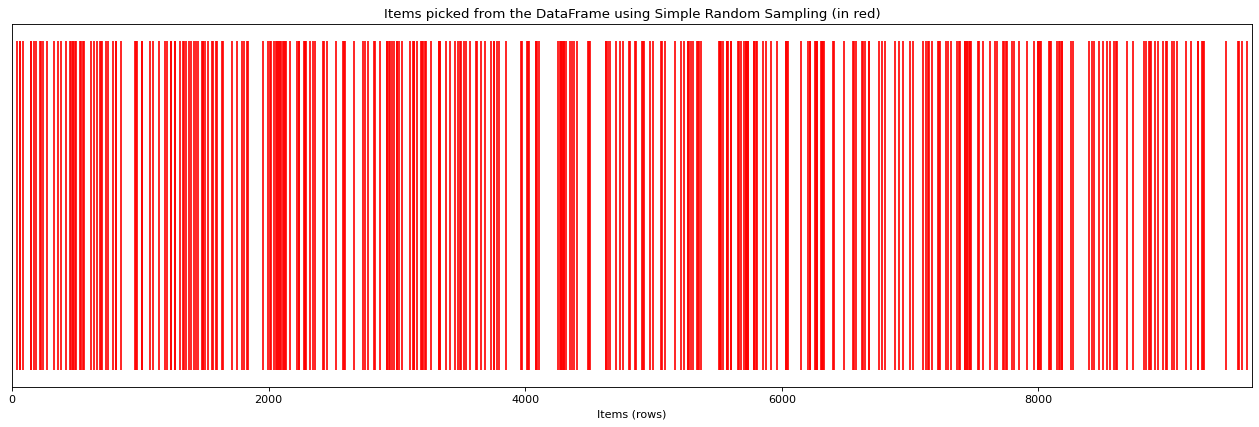

In [8]:
# Mostra aleatòria simple (Simple Random Sampling)
df_srs = df.sample(n)


# Resultat:
display(df_srs.head())

# Pintem un gràfic per veure visualment quines files s'han agafat per la mostra
# Eix horitzontal = Files del DataFrame. En vermell les files mostrejades 
plt.figure(figsize=(20, 6), dpi=80)
plt.vlines(df_srs.index.to_list(), 0, 1, color='red')
plt.xlim(0, len(df));
plt.title('Items picked from the DataFrame using Simple Random Sampling (in red)');
plt.xlabel('Items (rows)');
plt.yticks([]);


#### Mostra Sistemàtica (SS)

We first calculate the sampling interval by dividing the total number of households in the population (40) by the number we want in the sample (10). In this case, the sampling is 4. We then select a number between 1 and the sampling interval from the random number table (in this case 3). Household #3 is the first household. We then count down the list starting with household #3 and select each 4th household. For example, the second selected household is 3 + 4, or #7. Note that when you reach the end of the list, you should have selected your desired number of households. If you have not, you have counted wrong or miscalculated the sampling interval. You should go back and start over.

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Top5Budget
10,1995-96,3/9/1995,Zaragoza,Oviedo,1,0,H,1,0,H,False
36,1995-96,24/09/1995,Albacete,Celta,4,0,H,0,0,D,False
62,1995-96,4/10/1995,Sp Gijon,Sevilla,3,1,H,1,1,D,False
88,1995-96,21/10/1995,Valladolid,Ath Madrid,0,1,A,0,0,D,False
114,1995-96,5/11/1995,La Coruna,Espanol,0,1,A,0,0,D,False


First sample (random item in sampling interval): 10
Step size (=sampling interval): 26
Sample size (n): 370


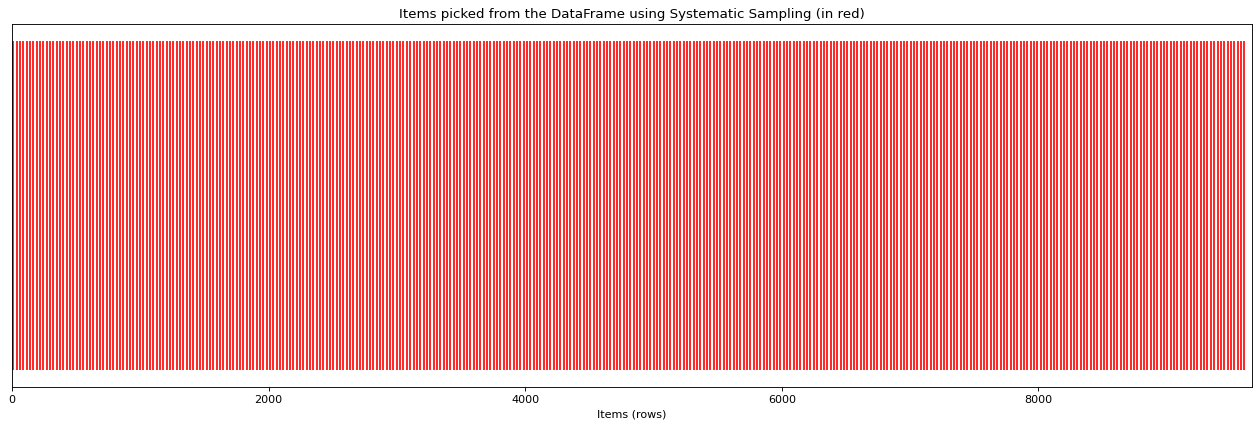

In [9]:
# Mostra Sistemàtica (Systematic Sampling)
sampling_interval = int(len(df)/n)
start = random.randint(0,sampling_interval)
indexes = range(start, sampling_interval*n, sampling_interval)
df_ss = df.iloc[indexes]

# Resultat:
display(df_ss.head())

print(f'First sample (random item in sampling interval): {start}')
print(f'Step size (=sampling interval): {sampling_interval}')
print(f'Sample size (n): {len(df_ss)}')

plt.figure(figsize=(20, 6), dpi=80)
plt.vlines(df_ss.index.to_list(), 0, 1, color='red')
plt.xlim(0, len(df));
plt.title('Items picked from the DataFrame using Systematic Sampling (in red)');
plt.xlabel('Items (rows)');
plt.yticks([]);

## Nivell 2
### Exercici 2
Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

#### Mostra Estratificada (Stratified Sampling)

- **Proportionate Stratified Sampling:** a la mostra cada grup apareix representat en la mateixa proporció que a la població

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Top5Budget
4457,2006-07,26/11/06,Betis,Espanol,1,1,D,1,0,H,False
4761,2007-08,23/09/07,Villarreal,Murcia,2,0,H,0,0,D,False
9326,2019-20,21/09/2019,Levante,Eibar,0,0,D,0,0,D,False
5549,2009-10,18/10/09,Malaga,Almeria,1,2,A,0,2,A,False
163,1995-96,3/12/1995,Valencia,Sociedad,0,1,A,0,0,D,True


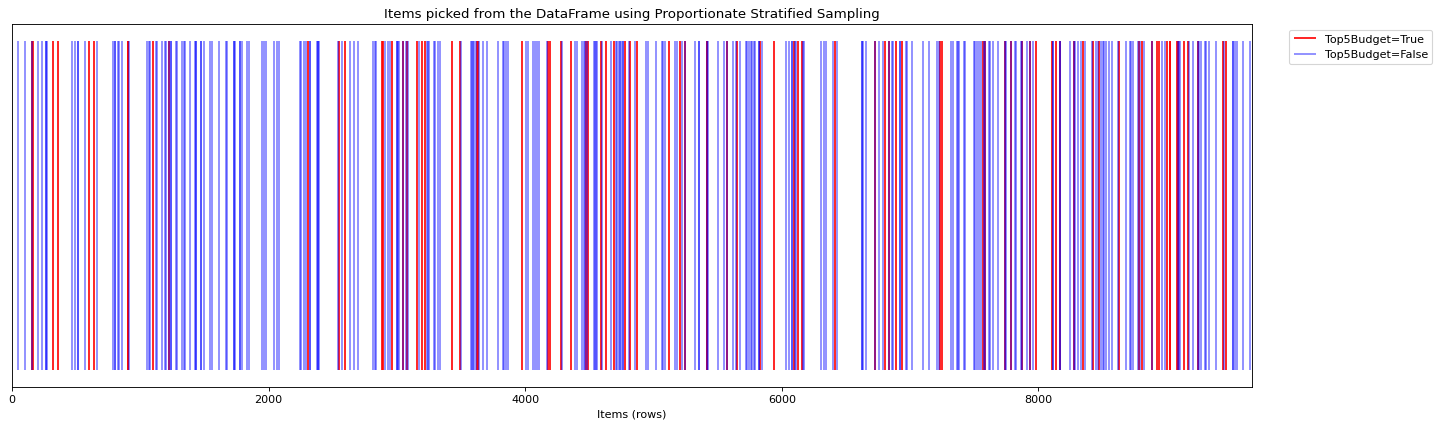

In [10]:
# Proportionate Stratified Sampling

from sklearn.model_selection import train_test_split
df_pss, _ = train_test_split(df, stratify=df['Top5Budget'], train_size=n)

#Resultat:
display(df_pss.head())

plt.figure(figsize=(20, 6), dpi=80)
plt.vlines(df_pss[df_pss.Top5Budget].index.to_list(), 0, 1, color='red', alpha=1, label="Top5Budget=True")
plt.vlines(df_pss[~df_pss.Top5Budget].index.to_list(), 0, 1, color='blue', alpha=0.5, label="Top5Budget=False")
plt.xlim(0, len(df));
plt.title('Items picked from the DataFrame using Proportionate Stratified Sampling');
plt.xlabel('Items (rows)');
plt.yticks([]);
plt.legend(loc='upper right', bbox_to_anchor=(1.15,1))

In [11]:
# Verificació: verifiquem que les proporcions de cada grup es mantenen

print(f'Proporcions de cada grup a la població:')
print(df.groupby('Top5Budget').size()/N)

print(f'\nProporcions de cada grup a la mostra:')
print(df_pss.groupby('Top5Budget').size()/n)

print(f'\nTamany de mostra per cada grup:')
print(df_pss.groupby('Top5Budget').size())


Proporcions de cada grup a la població:
Top5Budget
False    0.762003
True     0.237997
dtype: float64

Proporcions de cada grup a la mostra:
Top5Budget
False    0.762162
True     0.237838
dtype: float64

Tamany de mostra per cada grup:
Top5Budget
False    282
True      88
dtype: int64


- **Disproportionate Stratified Sampling:** predefinim el tamany de la mostra desitjat per cada grup (no es manté la mateixa proporció que a la població)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Top5Budget
7826,2015-16,3/10/2015,Granada,La Coruna,1,1,D,0,1,A,False
1703,1999-2000,29/08/1999,Zaragoza,Oviedo,4,0,H,2,0,H,False
1792,1999-2000,7/11/1999,Sociedad,Valladolid,3,0,H,2,0,H,False
8815,2017-18,31/03/18,Girona,Levante,1,1,D,0,0,D,False
8598,2017-18,14/10/17,Getafe,Real Madrid,1,2,A,0,1,A,False


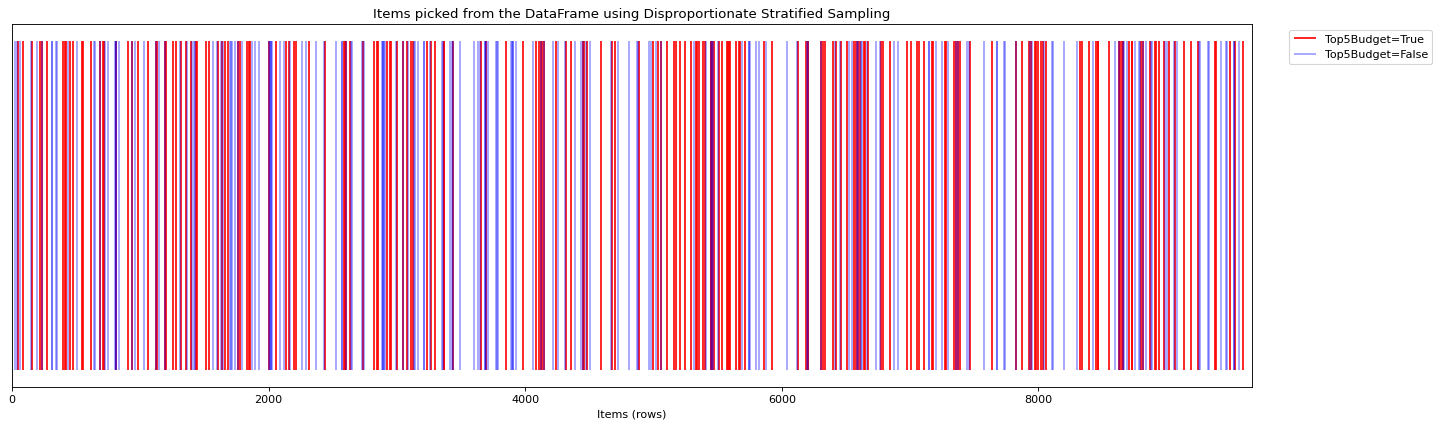

In [12]:
# Disproportionate Stratified Sampling

n_top5budget = {False: 200, True: 200} # Nombre de mostres que volem de cada grup (strata)
df_dss = df.groupby('Top5Budget', group_keys=False).apply(lambda x: x.sample(n_top5budget[x.name]))

# Resultat:
display(df_dss.head())

plt.figure(figsize=(20, 6), dpi=80)
plt.vlines(df_dss[df_dss.Top5Budget].index.to_list(), 0, 1, color='red', alpha=1, label="Top5Budget=True")
plt.vlines(df_dss[~df_dss.Top5Budget].index.to_list(), 0, 1, color='blue', alpha=0.4, label="Top5Budget=False")
plt.xlim(0, len(df));
plt.title('Items picked from the DataFrame using Disproportionate Stratified Sampling');
plt.xlabel('Items (rows)');
plt.yticks([]);
plt.legend(loc='upper right', bbox_to_anchor=(1.15,1))


In [13]:
# Verificació: verifiquem que les proporcions de cada grup NO es mantenen

print(f'Proporcions de cada grup a la població:')
print(df.groupby('Top5Budget').size()/N)

print(f'\nProporcions de cada grup a la mostra:')
print(df_dss.groupby('Top5Budget').size() / sum(n_top5budget.values()))

print(f'\nTamany de mostra per cada grup:')
print(df_dss.groupby('Top5Budget').size())


Proporcions de cada grup a la població:
Top5Budget
False    0.762003
True     0.237997
dtype: float64

Proporcions de cada grup a la mostra:
Top5Budget
False    0.5
True     0.5
dtype: float64

Tamany de mostra per cada grup:
Top5Budget
False    200
True     200
dtype: int64


#### SMOTE (Synthetic Minority Oversampling Technique)

SMOTE és una tècnica que prové de l'àmbit del Machine Learning que permet generar mostres de forma artificial a partir de les dades existents. És útil per exemple en ML quan volem entrenar un model de classificació i el dataset està molt desbalancejat (i.e. hi ha una classe de la qual disposem de molt poques mostres). En canvi, al generar dades sintètiques aqueta tècnica no sería adequada per fer un estudi estadístic d'un dataset (e.g. fer inferències sobre la població).

In [14]:
!pip install imbalanced-learn

In [15]:
# SMOTE només es pot fer servir amb variables numèriques
# Utilitzem la variant SMOTE-NC que sí permet variables categòriques (tot i que 
# requereix tenir alguna variable continua)

df_smote = df.copy()

# Convertim els strings a categòriques
#df_smote[['Season', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR']] = df[['Season', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR']].astype('category')

# Eliminem la columna Date
df_smote.drop(columns=['Date'], inplace=True)

# Eliminem les files que contenen NaN
df_smote.dropna(axis=0,how='any', inplace=True)

# Guardem els noms de les columnes ja que al utilitzar SMOTE
# ens retorna un np.array i es perden els noms i tipus de les columnes
col_names = df_smote.columns


In [16]:
# SMOTE (Synthetic Minority Oversampling Technique)
from imblearn.over_sampling import SMOTENC

# Separem la columna "Top5Budget" de la resta
X_df = df_smote.iloc[:,:-1]
y_df = df_smote.iloc[:,-1]

# Apliquem SMOTE-NC
smotenc = SMOTENC(random_state=42, 
                  categorical_features=[0,1,2,5,8],
                  sampling_strategy='minority')

X_sm, y_sm = smotenc.fit_resample(X_df, y_df)

# Convertim els arrays obtinguts de nou en un panda DataFrame
df_smote = pd.DataFrame(np.concatenate((X_sm,y_sm.reshape(-1,1)), axis=1),
                        columns=col_names)

df_smote.info()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14724 entries, 0 to 14723
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Season      14724 non-null  object
 1   HomeTeam    14724 non-null  object
 2   AwayTeam    14724 non-null  object
 3   FTHG        14724 non-null  object
 4   FTAG        14724 non-null  object
 5   FTR         14724 non-null  object
 6   HTHG        14724 non-null  object
 7   HTAG        14724 non-null  object
 8   HTR         14724 non-null  object
 9   Top5Budget  14724 non-null  object
dtypes: object(10)
memory usage: 1.1+ MB


In [17]:
# Per defecte tots els tipus del DataFrame són tipus object
# Podem reconvertir als tipus originals PERÒ tenint en compte que alguns tipus han canviat
# Per exemple el nombre de gols (FTAG, FTHG, etc) normalment serien sempre enters (int64)
# PERÒ les dades creades sintèticament poden contenir valors reals float64 (e.g. 1.63 gols)

new_dtypes = {'Season': str,
              'HomeTeam': str,
              'AwayTeam': str,
              'FTAG': 'float64',
              'FTHG': 'float64',
              'FTR': 'category',
              'HTAG': 'float64',
              'HTHG': 'float64',
              'HTR': 'category',
              'Top5Budget': 'bool'
              }

df_smote = df_smote.astype(new_dtypes)
df_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14724 entries, 0 to 14723
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Season      14724 non-null  object  
 1   HomeTeam    14724 non-null  object  
 2   AwayTeam    14724 non-null  object  
 3   FTHG        14724 non-null  float64 
 4   FTAG        14724 non-null  float64 
 5   FTR         14724 non-null  category
 6   HTHG        14724 non-null  float64 
 7   HTAG        14724 non-null  float64 
 8   HTR         14724 non-null  category
 9   Top5Budget  14724 non-null  bool    
dtypes: bool(1), category(2), float64(4), object(3)
memory usage: 848.7+ KB


In [18]:
# Verificació: verifiquem que les proporcions de cada grup NO es mantenen

print(f'Nombre de mostres de cada grup al dataset original:')
print(df.groupby('Top5Budget').size())

print(f'\nNombre de mostres de cada grup al nou dataset:')
print(df_smote.groupby('Top5Budget').size())


Nombre de mostres de cada grup al dataset original:
Top5Budget
False    7364
True     2300
dtype: int64

Nombre de mostres de cada grup al nou dataset:
Top5Budget
False    7362
True     7362
dtype: int64


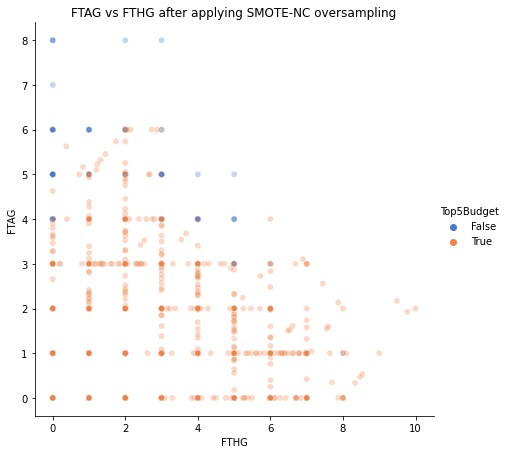

In [19]:
# Si dibuixem per exemple el nombre de gols FTAG vs FTAG, veiem que l'algoritme SMOTE 
# ha generat valors no-enters per la classe monitoritaria, com era d'esperar
sns.relplot(x="FTHG", y="FTAG", hue="Top5Budget", alpha=.3, palette="muted",
            height=6, data=df_smote);
plt.title('FTAG vs FTHG after applying SMOTE-NC oversampling');            

## Nivell 3
### Exercici 3
Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

Es tracta d'un mètode que permet mostrejar un nombre fix d'elements d'una font (població) de tamany desconegut amb probabilitats uniformes. Existèixen diferentes implementacions del mètode Reservoir sampling, el més intuïtiu (i també el menys eficient) és l'anomenat Algoritme R.

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Top5Budget
5355,2008-09,7/3/2009,Real Madrid,Ath Madrid,1,1,D,0,1,A,True
1953,1999-2000,5/3/2000,Vallecano,Alaves,0,1,A,0,0,D,False
4523,2006-07,20/01/07,Ath Madrid,Osasuna,1,0,H,0,0,D,True
4221,2005-06,5/3/2006,Santander,Mallorca,0,0,D,0,0,D,False
5245,2008-09,13/12/08,Valencia,Espanol,2,1,H,0,1,A,True


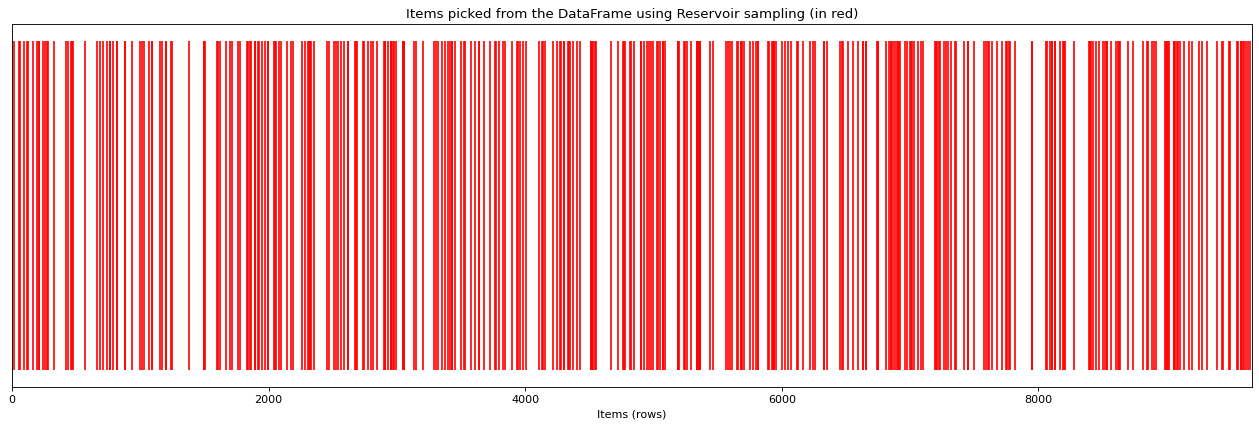

In [21]:
# Reservoir sampling (Algoritme R)

reservoir = [] # El tamany del reservoir (i de la mostra final) serà 'n'

# El stream en aquest cas seria la seqüència de files (o de números de files) del nostre dataframe
stream = range(len(df)) 

for i in stream: 

    # Omplim el reservori amb les n primeres mostres del stream
    if i+1<= n:
        reservoir.append(i)
    else:
        probability = n/(i+1)
        if random.random() < probability:
            # Seleccionem l'item del stream i eliminem un dels n items previament seleccionats
             reservoir[random.choice(range(0,n))] = i

df_rs1 = df.iloc[reservoir,:]

# Resultat:
display(df_rs1.head())

plt.figure(figsize=(20, 6), dpi=80)
plt.vlines(df_rs1.index.to_list(), 0, 1, color='red' )
plt.xlim(0, len(df));
plt.title('Items picked from the DataFrame using Reservoir sampling (in red)')
plt.xlabel('Items (rows)');
plt.yticks([]);